In [26]:
### import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# generally these are formed from quadratic equations

In [7]:
x = 6*np.random.rand(100,1)-3
y = 0.5*x**2+1.5*x+2+np.random.randn(100,1)
# quadratic equation used is y = 0.5x*2 + 1.5x + 2+outliers

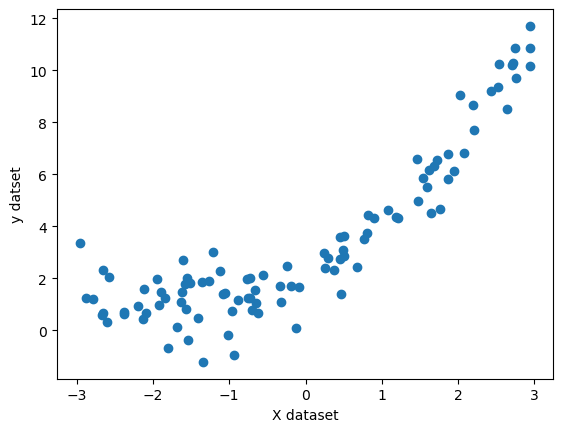

In [8]:
plt.scatter(x,y)
plt.xlabel("X dataset")
plt.ylabel("y datset")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =  train_test_split(x,y,random_state=42,test_size=0.2)



In [10]:
## lets implemene simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(xtrain,ytrain)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
score = r2_score(ytest,model.predict(xtest))
score

0.6502325157187295

[]

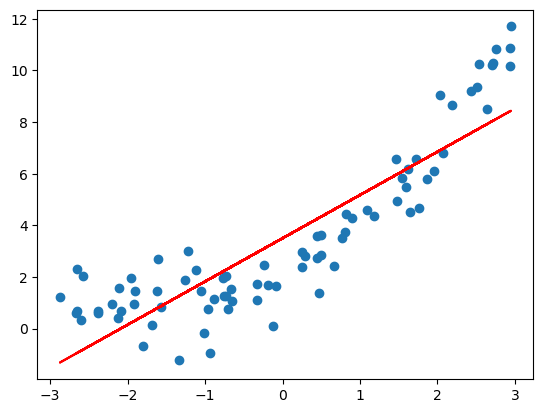

In [13]:
# lets visualize the mode
plt.plot(xtrain,model.predict(xtrain),color="r")
plt.scatter(xtrain,ytrain)
plt.plot()

In [14]:
# lets apply polynoimal transformation
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=3,include_bias=True)
xtrainpoly = poly.fit_transform(xtrain)
xtestpoly = poly.transform(xtest)

In [16]:
## lets implemenent  polynomial regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtrainpoly,ytrain)
from sklearn.metrics import r2_score
score = r2_score(ytest,model1.predict(xtestpoly))
score

0.9150027374705008

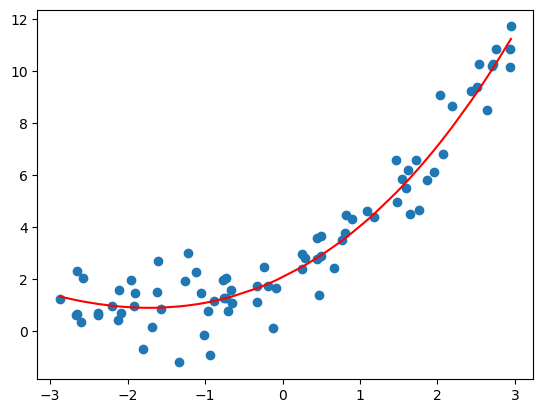

In [17]:
plt.scatter(xtrain, ytrain)
plt.plot(np.sort(xtrain, axis=0),
         model1.predict(poly.transform(np.sort(xtrain, axis=0))),
         color='r')


In [18]:
# Prediction of new data
xnew = np.linspace(-3,3,200).reshape(200,1)
xnewpoly = poly.transform(xnew)
xnewpoly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

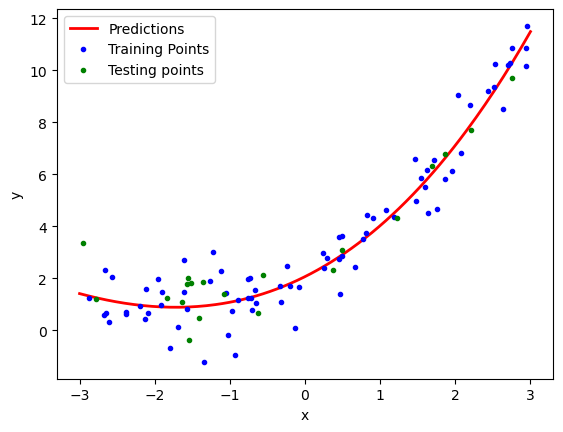

In [19]:
ynew = model1.predict(xnewpoly)
plt.plot(xnew,ynew,"r-",linewidth=2,label="Predictions")
plt.plot(xtrain,ytrain,"b.",linewidth=2,label="Training Points")
plt.plot(xtest,ytest,"g.",linewidth=2,label="Testing points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [20]:
from sklearn.pipeline import Pipeline

In [24]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(xtrain,ytrain) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(xtrain, ytrain, "b.", linewidth=3)
    plt.plot(xtest, ytest, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

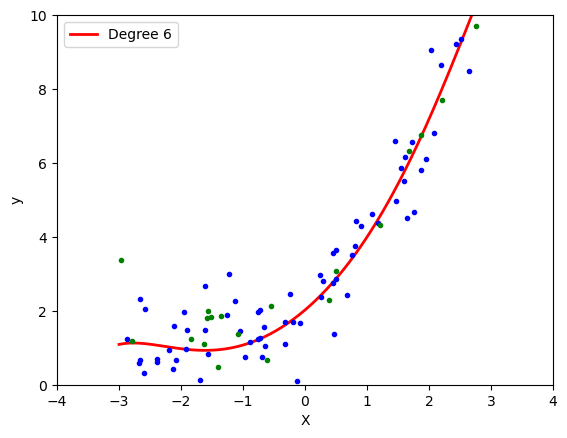

In [25]:
import numpy as np
poly_regression(6)